In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
prem_df = pd.read_csv("PremierLeague_Data.csv")
prem_df.head()
prem_df_og = prem_df
prem_df_og.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HF,AF,HC,AC,HY,AY,HR,AR,Home Formation,Away Formation
0,13-08-2016,Burnley,Swansea,0,1,A,0,0,D,J Moss,...,10,14,7,4,3,2,0,0,4-4-2-0,4-3-3-0
1,13-08-2016,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,...,12,15,3,6,2,2,0,0,4-2-3-1,4-4-2-0
2,13-08-2016,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,...,10,14,5,6,0,0,0,0,3-4-2-1,4-2-3-1
3,13-08-2016,Hull,Leicester,2,1,H,1,0,H,M Dean,...,8,17,5,3,2,2,0,0,4-3-3-0,4-4-2-0
4,13-08-2016,Man City,Sunderland,2,1,H,1,0,H,R Madley,...,11,14,9,6,1,2,0,0,4-2-3-1,4-2-3-1


In [ ]:
import pandas as pd


prem_df['Home_Form'] = ''
prem_df['Away_Form'] = ''


home_form_dict = {}
away_form_dict = {}

for index, row in prem_df.iterrows():

    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTR']

    home_form = ''
    away_form = ''

    if home_team in home_form_dict:
        home_form_dict[home_team] = result + home_form_dict[home_team][:4]
    else:
        home_form_dict[home_team] = result

    if away_team in away_form_dict:
        away_form_dict[away_team] = result + away_form_dict[away_team][:4]
    else:
        away_form_dict[away_team] = result

    if home_team in home_form_dict:
        home_form = home_form_dict[home_team]

    if away_team in away_form_dict:
        away_form = away_form_dict[away_team]

    home_form = home_form.replace('H', 'W').replace('A', 'L')
    away_form = away_form.replace('H', 'L').replace('A', 'W')

    prem_df.at[index, 'Home_Form'] = home_form
    prem_df.at[index, 'Away_Form'] = away_form


In [ ]:
prem_df[['H_def', 'H_mid', 'H_attackmid', 'H_forward']] = prem_df['Home Formation'].str.split('-', expand=True)
prem_df[['A_def', 'A_mid', 'A_attackmid', 'A_forward']] = prem_df['Away Formation'].str.split('-', expand=True)

In [ ]:
prem_df['H_Formation_Score'] = prem_df.apply(lambda row: (int(row['H_def']) * 0.25
                                                          + int(row['H_mid']) * 0.5 +
                                                          int(row['H_attackmid']) * 0.75 +
                                                          int(row['H_forward'])) / 3.75, axis=1)

In [ ]:
prem_df['A_Formation_Score'] = prem_df.apply(lambda row: (int(row['A_def']) * 0.25
                                                          + int(row['A_mid']) * 0.5
                                                          + int(row['A_attackmid']) * 0.75
                                                          + int(row['A_forward'])) / 3.75, axis=1)

In [ ]:
prem_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Home Formation', 'Away Formation', 'Home_Form',
       'Away_Form', 'H_def', 'H_mid', 'H_attackmid', 'H_forward', 'A_def',
       'A_mid', 'A_attackmid', 'A_forward', 'H_Formation_Score',
       'A_Formation_Score'],
      dtype='object')

In [ ]:
prem_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,H_def,H_mid,H_attackmid,H_forward,A_def,A_mid,A_attackmid,A_forward,H_Formation_Score,A_Formation_Score
0,13-08-2016,Burnley,Swansea,0,1,A,0,0,D,J Moss,...,4,4,2,0,4,3,3,0,1.200000,1.266667
1,13-08-2016,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,...,4,2,3,1,4,4,2,0,1.400000,1.200000
2,13-08-2016,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,...,3,4,2,1,4,2,3,1,1.400000,1.400000
3,13-08-2016,Hull,Leicester,2,1,H,1,0,H,M Dean,...,4,3,3,0,4,4,2,0,1.266667,1.200000
4,13-08-2016,Man City,Sunderland,2,1,H,1,0,H,R Madley,...,4,2,3,1,4,2,3,1,1.400000,1.400000


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('prem_output.csv')
encoder = OneHotEncoder()
categorical_columns = ['HomeTeam', 'AwayTeam']
encoded_features = encoder.fit_transform(df[categorical_columns]).toarray()

#after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# DataFrame with the encoded features and feature names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine encoded features with og dataset
final_df = pd.concat([df, encoded_df], axis=1)
final_df.drop(columns=categorical_columns, inplace=True)

correlation_matrix = final_df.corr().abs()

threshold = 0.65

upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]


for feature in highly_correlated_features:
    print(f"Highly correlated feature: {feature}")


Highly correlated feature: HTHG
Highly correlated feature: HTAG
Highly correlated feature: HST
Highly correlated feature: AST
Highly correlated feature: H_attackmid
Highly correlated feature: A_attackmid
Highly correlated feature: H_Formation_Score
Highly correlated feature: A_Formation_Score


<ipython-input-3-b440892d856b>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr().abs()


In [ ]:
df = pd.read_csv('prem_output.csv')
df.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Home Formation', 'Away Formation',
       'Home_Form', 'Away_Form', 'H_def', 'H_mid', 'H_attackmid', 'H_forward',
       'A_def', 'A_mid', 'A_attackmid', 'A_forward', 'H_Formation_Score',
       'A_Formation_Score', 'Home_Team_Form', 'Away_Team_Form'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
df = pd.read_csv('prem_output.csv')
encoder = LabelEncoder()

df['Home_Team_Encoded'] = encoder.fit_transform(df['HomeTeam'])
df['Away_Team_Encoded'] = encoder.fit_transform(df['AwayTeam'])



X = df[['HTHG', 'HTAG','H_Formation_Score','A_Formation_Score','Home_Team_Form', 'Away_Team_Form','HST', 'AST','HC', 'AC']]
y = df['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 2
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_feature_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]

model_1 = LogisticRegression()
model_2 = RandomForestClassifier()
model_3 = SVC()
model_4 = GradientBoostingClassifier()

# Train the model on the selected features
model_1.fit(X_train_selected, y_train)
model_2.fit(X_train_selected, y_train)
model_3.fit(X_train_selected, y_train)
model_4.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_selected)
y_pred_2 = model_2.predict(X_test_selected)
y_pred_3 = model_3.predict(X_test_selected)
y_pred_4 = model_4.predict(X_test_selected)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_4 = accuracy_score(y_test, y_pred_4)

f1_1 = f1_score(y_test, y_pred_1,average='weighted')
f1_2 = f1_score(y_test, y_pred_2,average='weighted')
f1_3 = f1_score(y_test, y_pred_3,average='weighted')
f1_4 = f1_score(y_test, y_pred_4,average='weighted')


p_1 = precision_score(y_test, y_pred_1,average='weighted')
p_2 = precision_score(y_test, y_pred_2,average='weighted')
p_3 = precision_score(y_test, y_pred_3,average='weighted')
p_4 = precision_score(y_test, y_pred_4,average='weighted')

r_1 = recall_score(y_test, y_pred_1,average='weighted')
r_2 = recall_score(y_test, y_pred_2,average='weighted')
r_3 = recall_score(y_test, y_pred_3,average='weighted')
r_4 = recall_score(y_test, y_pred_4,average='weighted')


print(f"Accuracy LR: {accuracy_1}",f1_1,p_1,r_1)
print(f"Accuracy RF: {accuracy_2}",f1_2,p_2,r_2)
print(f"Accuracy SVC: {accuracy_3}",f1_3,p_3,r_3)
print(f"Accuracy GBC: {accuracy_4}",f1_4,p_4,r_3)

Accuracy LR: 0.7719298245614035 0.7566266709182965 0.755749675501969 0.7719298245614035
Accuracy RF: 0.7880116959064327 0.782792760547507 0.7836018540007812 0.7880116959064327
Accuracy SVC: 0.7719298245614035 0.7495979770518402 0.7560487448386201 0.7719298245614035
Accuracy GBC: 0.8172514619883041 0.8109722197340549 0.8110601372016547 0.7719298245614035


In [ ]:
df_22_23 = pd.read_csv('/content/2022-23_output.csv')
df_22_23.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Hformation', 'Aformation', 'Home_Form',
       'Away_Form', 'H_def', 'H_mid', 'H_attackmid', 'H_forward', 'A_def',
       'A_mid', 'A_attackmid', 'A_forward', 'H_Formation_Score',
       'A_Formation_Score', 'Home_Team_Form', 'Away_Team_Form'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()
df_22_23['Home_Team_Encoded'] = encoder.fit_transform(df_22_23['HomeTeam'])
df_22_23['Away_Team_Encoded'] = encoder.fit_transform(df_22_23['AwayTeam'])

X_22_23 = df_22_23[['HTHG', 'HTAG', 'H_Formation_Score', 'A_Formation_Score', 'Home_Team_Form', 'Away_Team_Form', 'HST', 'AST', 'HC', 'AC']]

In [ ]:
X_22_23_selected = selector.transform(X_22_23)

In [ ]:
y_22_23 = model_4.predict(X_22_23_selected)

In [ ]:
df_22_23['Predicted_Result'] = y_22_23

In [ ]:
df_22_23.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,A_mid,A_attackmid,A_forward,H_Formation_Score,A_Formation_Score,Home_Team_Form,Away_Team_Form,Home_Team_Encoded,Away_Team_Encoded,Predicted_Result
0,05-08-2022,Crystal Palace,Arsenal,0,2,A,0,1,A,A Taylor,...,3,3,0,1.400000,1.266667,0.000000,1.000000,6,0,A
1,06-08-2022,Bournemouth,Aston Villa,2,0,H,1,0,H,P Bankes,...,3,3,0,1.333333,1.266667,1.000000,0.000000,2,1,H
2,06-08-2022,Everton,Chelsea,0,1,A,0,1,A,C Pawson,...,4,3,0,1.066667,1.333333,0.000000,1.000000,7,5,A
3,06-08-2022,Fulham,Liverpool,2,2,D,1,0,H,A Madley,...,3,3,0,1.400000,1.266667,0.333333,0.333333,8,11,D
4,06-08-2022,Leeds,Wolves,2,1,H,1,1,D,R Jones,...,2,3,1,1.400000,1.400000,1.000000,0.000000,9,19,H


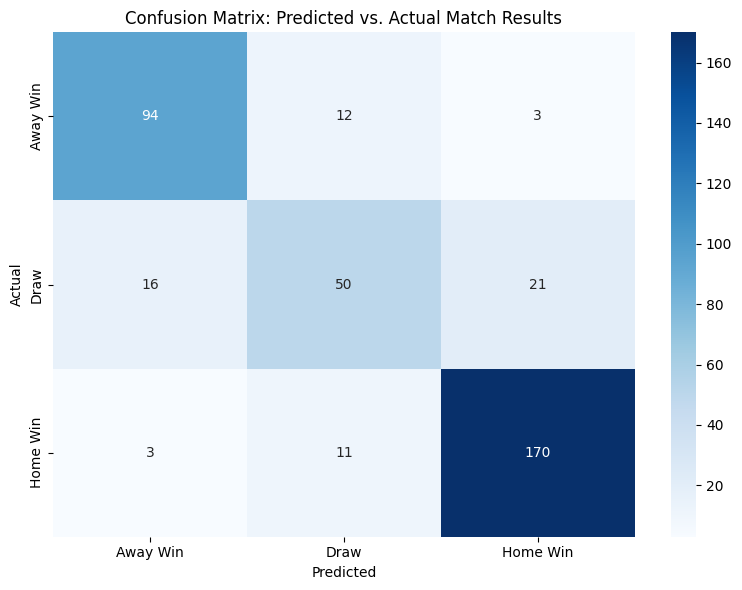

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(df_22_23['FTR'], df_22_23['Predicted_Result'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs. Actual Match Results')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Away Win', 'Draw', 'Home Win'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Away Win', 'Draw', 'Home Win'])
plt.tight_layout()

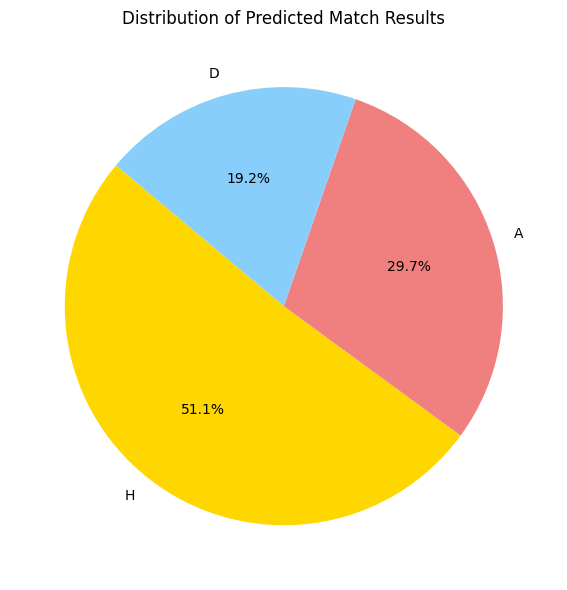

In [ ]:
predicted_results_counts = df_22_23['Predicted_Result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(predicted_results_counts, labels=predicted_results_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Predicted Match Results')
plt.tight_layout()


plt.show()

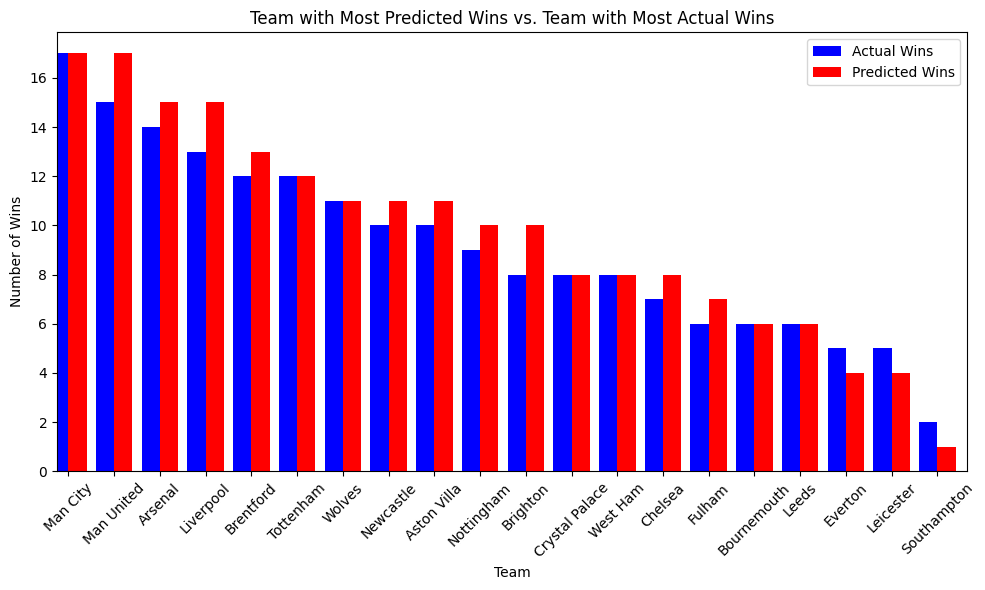

In [ ]:
actual_wins = df_22_23[df_22_23['FTR'] == 'H']['HomeTeam'].value_counts()
predicted_wins = df_22_23[df_22_23['Predicted_Result'] == 'H']['HomeTeam'].value_counts()

plt.figure(figsize=(10, 6))
width = 0.4
actual_wins.plot(kind='bar', position=1, width=width, color='blue', label='Actual Wins')
predicted_wins.plot(kind='bar', position=0, width=width, color='', label='Predicted Wins')
plt.title('Team with Most Predicted Wins vs. Team with Most Actual Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Home Formation', 'Away Formation',
       'Home_Form', 'Away_Form', 'H_def', 'H_mid', 'H_attackmid', 'H_forward',
       'A_def', 'A_mid', 'A_attackmid', 'A_forward', 'H_Formation_Score',
       'A_Formation_Score', 'Home_Team_Form', 'Away_Team_Form',
       'Home_Team_Encoded', 'Away_Team_Encoded'],
      dtype='object')

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

<ipython-input-38-f23f18675e7b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


In [ ]:
graph_df = pd.read_csv('prem_output.csv')

In [ ]:
graph_df['Date'] = pd.to_datetime(graph_df['Date'])


graph_df['Year'] = graph_df['Date'].dt.year

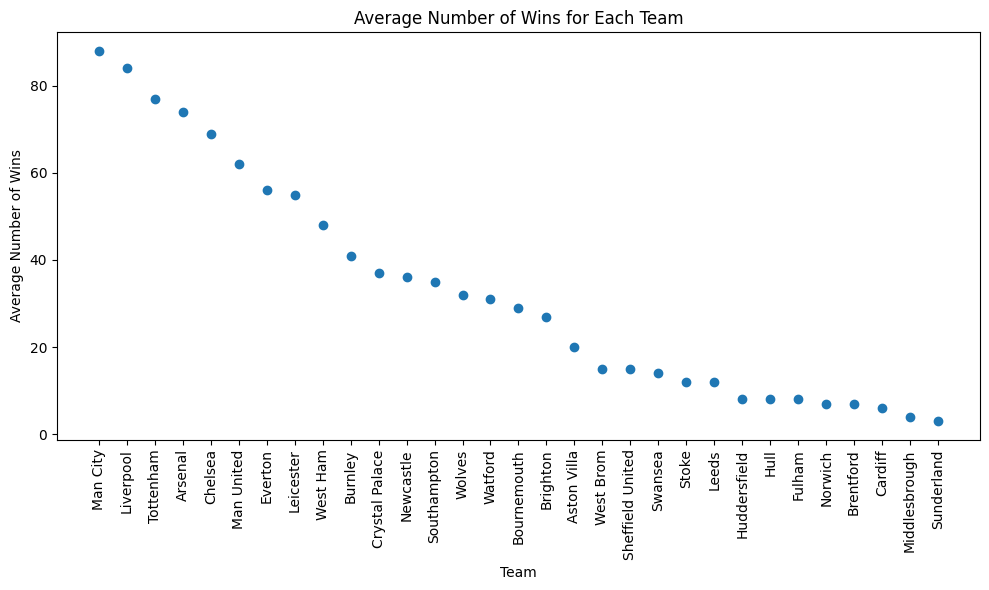

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


home_wins = graph_df[graph_df['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='HomeWins')
away_wins = graph_df[graph_df['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='AwayWins')

total_wins = pd.concat([home_wins, away_wins], ignore_index=True)


avg_wins = total_wins.groupby('HomeTeam')['HomeWins'].mean().reset_index()


avg_wins = avg_wins.sort_values(by='HomeWins', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(avg_wins['HomeTeam'], avg_wins['HomeWins'])
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.title('Average Number of Wins for Each Team')
plt.tight_layout()
plt.show()


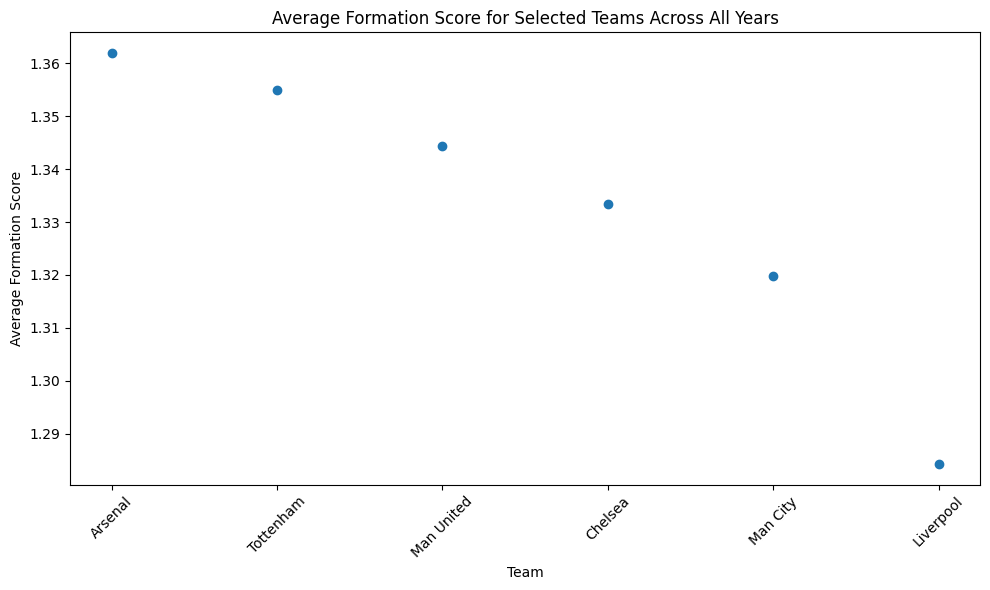

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


avg_home_formation = graph_df.groupby('HomeTeam')['H_Formation_Score'].mean().reset_index()

avg_away_formation = graph_df.groupby('AwayTeam')['A_Formation_Score'].mean().reset_index()

avg_formation = pd.concat([avg_home_formation, avg_away_formation], ignore_index=True)

avg_team_formation = avg_formation.groupby('HomeTeam')['H_Formation_Score'].mean().reset_index()

selected_teams = ['Man City', 'Liverpool', 'Man United', 'Arsenal', 'Tottenham', 'Chelsea']
avg_team_formation = avg_team_formation[avg_team_formation['HomeTeam'].isin(selected_teams)]

avg_team_formation = avg_team_formation.sort_values(by='H_Formation_Score', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(avg_team_formation['HomeTeam'], avg_team_formation['H_Formation_Score'])
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Average Formation Score')
plt.title('Average Formation Score for Selected Teams Across All Years')
plt.tight_layout()
plt.show()


<ipython-input-16-ecd10aeefb3c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Date'] = pd.to_datetime(graph_df['Date'])
<ipython-input-16-ecd10aeefb3c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Year'] = graph_df['Date'].dt.year


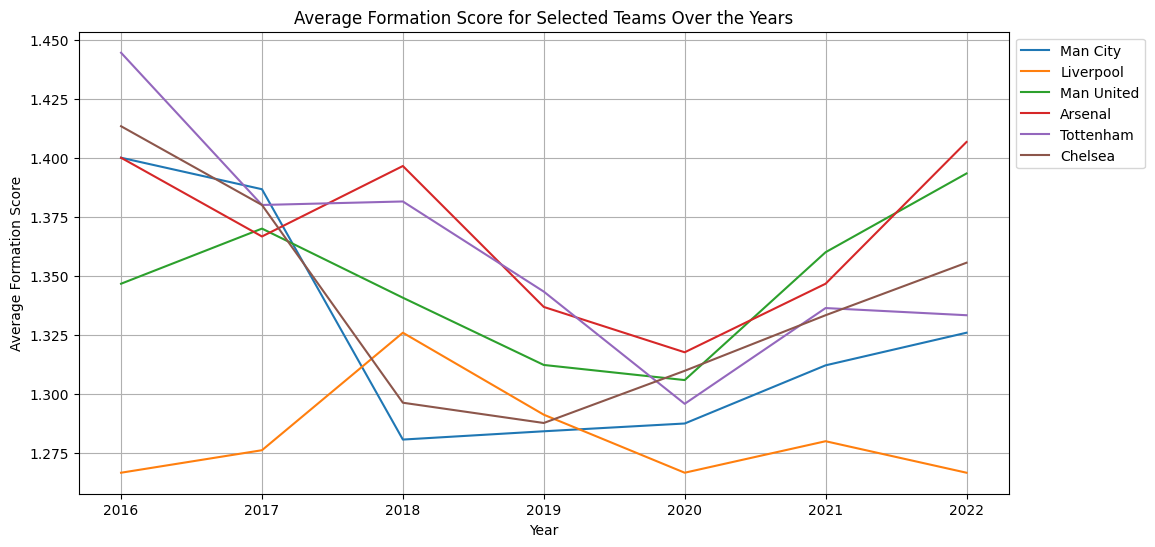

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


selected_teams = ['Man City', 'Liverpool', 'Man United', 'Arsenal', 'Tottenham', 'Chelsea']
graph_df = graph_df[graph_df['HomeTeam'].isin(selected_teams) | graph_df['AwayTeam'].isin(selected_teams)]

graph_df['Date'] = pd.to_datetime(graph_df['Date'])

graph_df['Year'] = graph_df['Date'].dt.year

avg_home_formation = graph_df.groupby(['HomeTeam', 'Year'])['H_Formation_Score'].mean().reset_index()

avg_away_formation = graph_df.groupby(['AwayTeam', 'Year'])['A_Formation_Score'].mean().reset_index()

avg_formation = pd.concat([avg_home_formation, avg_away_formation], ignore_index=True)

avg_team_formation = avg_formation.groupby(['HomeTeam', 'Year'])['H_Formation_Score'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for team in selected_teams:
    team_data = avg_team_formation[avg_team_formation['HomeTeam'] == team]
    plt.plot(team_data['Year'], team_data['H_Formation_Score'], label=team)

plt.xlabel('Year')
plt.ylabel('Average Formation Score')
plt.title('Average Formation Score for Selected Teams Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


<ipython-input-6-5282f4147603>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
<ipython-input-6-5282f4147603>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


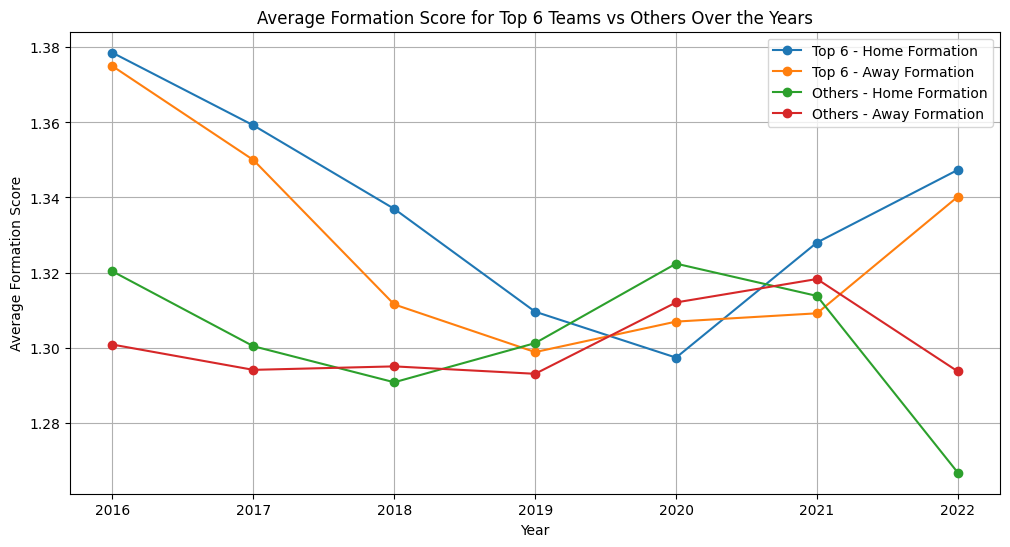

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


selected_teams = ['Man City', 'Liverpool', 'Man United', 'Arsenal', 'Tottenham', 'Chelsea']
filtered_df = graph_df[graph_df['HomeTeam'].isin(selected_teams) | graph_df['AwayTeam'].isin(selected_teams)]


filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


filtered_df['Year'] = filtered_df['Date'].dt.year


top_6_avg_formation = filtered_df.groupby('Year').apply(
    lambda group: pd.Series({
        'avg_home_formation_top6': group[group['HomeTeam'].isin(selected_teams)]['H_Formation_Score'].mean(),
        'avg_away_formation_top6': group[group['AwayTeam'].isin(selected_teams)]['A_Formation_Score'].mean()
    })
).reset_index()


other_teams_avg_formation = filtered_df.groupby('Year').apply(
    lambda group: pd.Series({
        'avg_home_formation_others': group[~group['HomeTeam'].isin(selected_teams)]['H_Formation_Score'].mean(),
        'avg_away_formation_others': group[~group['AwayTeam'].isin(selected_teams)]['A_Formation_Score'].mean()
    })
).reset_index()


result_df = pd.merge(top_6_avg_formation, other_teams_avg_formation, on='Year')

# Plotting
plt.figure(figsize=(12, 6))


plt.plot(result_df['Year'], result_df['avg_home_formation_top6'], marker='o', label='Top 6 - Home Formation')
plt.plot(result_df['Year'], result_df['avg_away_formation_top6'], marker='o', label='Top 6 - Away Formation')

plt.plot(result_df['Year'], result_df['avg_home_formation_others'], marker='o', label='Others - Home Formation')
plt.plot(result_df['Year'], result_df['avg_away_formation_others'], marker='o', label='Others - Away Formation')

plt.xlabel('Year')
plt.ylabel('Average Formation Score')
plt.title('Average Formation Score for Top 6 Teams vs Others Over the Years')
plt.legend()
plt.grid(True)
plt.show()
